In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## **Diamonds Prices 2022**
В данном наборе данных представлена цена на алмазы. 
Проблемная область: ценообразование бриллиантов
Объект наблюдения: бриллиант
Атрибуты: идентификатор, вес, качество огранки, цвет, чистота, общая глубина, ширина верхней грани, цена, длина, ширина, высота.
Бизнес-цели:
Повышение эффективности маркетинговых кампаний: Цель: Использование данных о бриллиантах для разработки целевых маркетинговых кампаний, направленных на конкретные сегменты рынка.

In [24]:
df = pd.read_csv("..//static//csv//DiamondsPrices2022.csv")
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


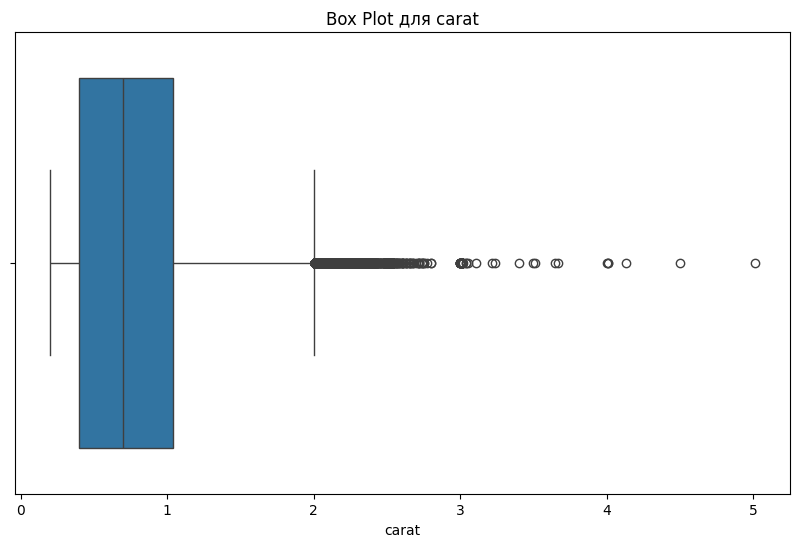

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['carat'])
plt.title('Box Plot для carat')
plt.xlabel('carat')
plt.show()

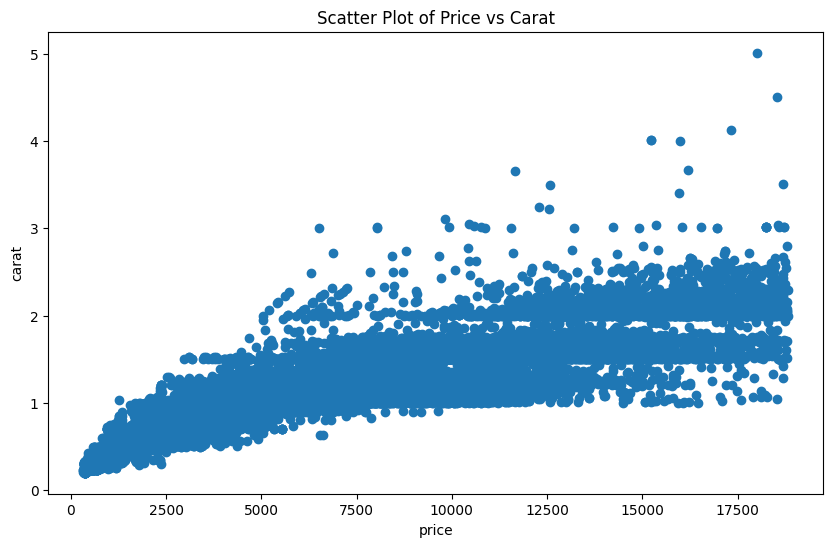

In [26]:
# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df["price"], df["carat"])
plt.xlabel("price")
plt.ylabel("carat")
plt.title("Scatter Plot of Price vs Carat")
plt.show()

Удаление строк с пустыми значениями

In [27]:
df_cleaned = df.dropna()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [28]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 32365
Размер контрольной выборки: 10789
Размер тестовой выборки: 10789


Оценка сбалансированности выборок

In [29]:
def check_balance(df, name):
    counts = df['price'].value_counts()
    print(f"Распределение price в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение price в обучающей выборке:
price
789      80
605      79
544      72
552      72
828      71
         ..
9942      1
7787      1
18663     1
7979      1
8164      1
Name: count, Length: 9496, dtype: int64

Распределение price в контрольной выборке:
price
625      34
828      31
605      30
789      26
544      26
         ..
4188      1
7541      1
3498      1
3314      1
12196     1
Name: count, Length: 5383, dtype: int64

Распределение price в тестовой выборке:
price
802     33
844     29
776     29
675     26
645     25
        ..
1567     1
5529     1
2031     1
417      1
5431     1
Name: count, Length: 5338, dtype: int64



Выполним овер- и андер- слемпинг.

In [30]:
def oversample(df):
    X = df.drop("price", axis=1)
    y = df["price"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df


train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение price в обучающей выборке после oversampling:
price
5076    80
1789    80
3931    80
1263    80
2026    80
        ..
3678    80
4592    80
516     80
7152    80
2353    80
Name: count, Length: 9496, dtype: int64

Распределение price в контрольной выборке после oversampling:
price
966      34
13638    34
3669     34
1052     34
2818     34
         ..
4032     34
544      34
3362     34
6559     34
792      34
Name: count, Length: 5383, dtype: int64

Распределение price в тестовой выборке после oversampling:
price
3742     33
559      33
8403     33
1238     33
1243     33
         ..
1149     33
2401     33
958      33
702      33
14618    33
Name: count, Length: 5338, dtype: int64



In [31]:
def undersample(df):
    X = df.drop('price', axis=1)
    y = df['price']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение price в обучающей выборке после undersampling:
price
18823    1
326      1
327      1
336      1
337      1
        ..
353      1
351      1
348      1
345      1
344      1
Name: count, Length: 9496, dtype: int64

Распределение price в контрольной выборке после undersampling:
price
18804    1
334      1
345      1
351      1
352      1
        ..
373      1
371      1
369      1
367      1
366      1
Name: count, Length: 5383, dtype: int64

Распределение price в тестовой выборке после undersampling:
price
18803    1
335      1
336      1
337      1
358      1
        ..
386      1
384      1
380      1
378      1
375      1
Name: count, Length: 5338, dtype: int64



## **14,400 Classic Rock Tracks (with Spotify Data)**

 Этот набор данных, содержащий 1200 уникальных альбомов и 14 400 треков. Каждый трек каталогизирован с 18 столбцами данных, такие как название трека, исполнитель, альбом и год выпуска. 
 Бизнес-цель: улучшение стратегии маркетинга и продвижения музыкальных треков, создание алгоритмов, которые будут рекомендовать пользователям музыку на основе их предпочтений. 
 Цель технического проекта: Разработать и внедрить систему рекомендаций, которая будет предсказывать и рекомендовать пользователям музыкальные треки на основе их предпочтений и поведения. 
 Входные данные: 
 Данные о пользователях: Идентификатор пользователя, история прослушиваний, оценки треков, время прослушивания, частота прослушивания.
 Данные о треках: Атрибуты треков (название, исполнитель, альбом, год, длительность, танцевальность, энергичность, акустичность и т.д.).
 Данные о взаимодействии: Время и частота взаимодействия пользователя с определенными треками. 
 Целевой признак: Рекомендации: Булева переменная, указывающая, должен ли конкретный трек быть рекомендован пользователю (1 - рекомендуется, 0 - не рекомендуется).

Выгрузка данных из csv файла "Данные о клиентах" в датафрейм

In [32]:
df = pd.read_csv("..//static//csv//UltimateClassicRock.csv")
print(df.columns)

Index(['Track', 'Artist', 'Album', 'Year', 'Duration', 'Time_Signature',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Popularity'],
      dtype='object')


Анализируем датафрейм при помощи "ящика с усами". Есть смещение в сторону меньших значений, это можно исправить при помощи oversampling и undersampling.

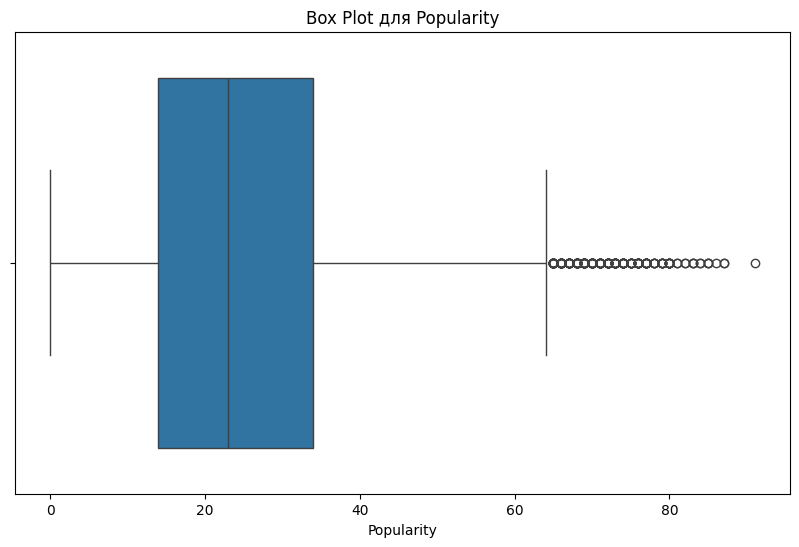

In [33]:
# Box plot для столбца 'Popularity'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Box Plot для Popularity')
plt.xlabel('Popularity')
plt.show()

Решим проблему пустых значений при помощи удаления таких строк.

In [34]:
df_cleaned = df.dropna()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [35]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 8650
Размер контрольной выборки: 2884
Размер тестовой выборки: 2884


Оценка сбалансированности выборок

In [36]:
def check_balance(df, name):
    counts = df['Popularity'].value_counts()
    print(f"Распределение Popularity в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Popularity в обучающей выборке:
Popularity
23    258
15    250
26    246
21    245
14    245
     ... 
84      1
87      1
91      1
79      1
86      1
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке:
Popularity
17    90
26    86
21    83
24    83
28    80
      ..
85     1
83     1
84     1
80     1
77     1
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке:
Popularity
22    86
21    85
12    84
20    82
26    81
      ..
76     2
71     2
79     1
82     1
80     1
Name: count, Length: 80, dtype: int64



Выполним овер- и андер- слемпинг.

In [37]:
def oversample(df):
    X = df.drop('Popularity', axis=1)
    y = df['Popularity']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение Popularity в обучающей выборке после oversampling:
Popularity
44    258
20    258
30    258
27    258
8     258
     ... 
78    258
79    258
74    258
81    258
86    258
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке после oversampling:
Popularity
21    90
11    90
28    90
23    90
37    90
      ..
61    90
84    90
80    90
77    90
0     90
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке после oversampling:
Popularity
14    86
47    86
27    86
13    86
66    86
      ..
63    86
79    86
71    86
82    86
80    86
Name: count, Length: 80, dtype: int64



In [38]:
def undersample(df):
    X = df.drop('Popularity', axis=1)
    y = df['Popularity']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение Popularity в обучающей выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
84    1
85    1
86    1
87    1
91    1
Name: count, Length: 88, dtype: int64

Распределение Popularity в контрольной выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
82    1
83    1
84    1
85    1
87    1
Name: count, Length: 85, dtype: int64

Распределение Popularity в тестовой выборке после undersampling:
Popularity
0     1
1     1
2     1
3     1
4     1
     ..
76    1
77    1
79    1
80    1
82    1
Name: count, Length: 80, dtype: int64



## **Car Price Prediction Challenge**
В данном наборе данных представлена цена на автомобили
Проблемная область: ценообразование автомобилей
Объект наблюдения: автомобили
Атрибуты: идентификатор, цена, сбор, производитель, модель, год выпуска, категория, наличие кожаного салона, тип топлива, объём двигателя, пробег, циллиндры, тип коробки передач, колеса, двери, цвет и подушки безопасности.
Бизнес-цель: Построение моделей для прогнозирования цен на автомобили на основе их характеристик.
Эффект для бизнеса: Оптимизация стратегии продаж и увеличение прибыли.
Цель: Разработка модели для прогнозирования цен.
Входные данные: Данные о характеристиках автомобилей (год выпуска, тип топлива, пробег и др.).
Целевой признак: Цена автомобиля.

In [73]:
df = pd.read_csv("..//static//csv//car_price_prediction.csv")
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


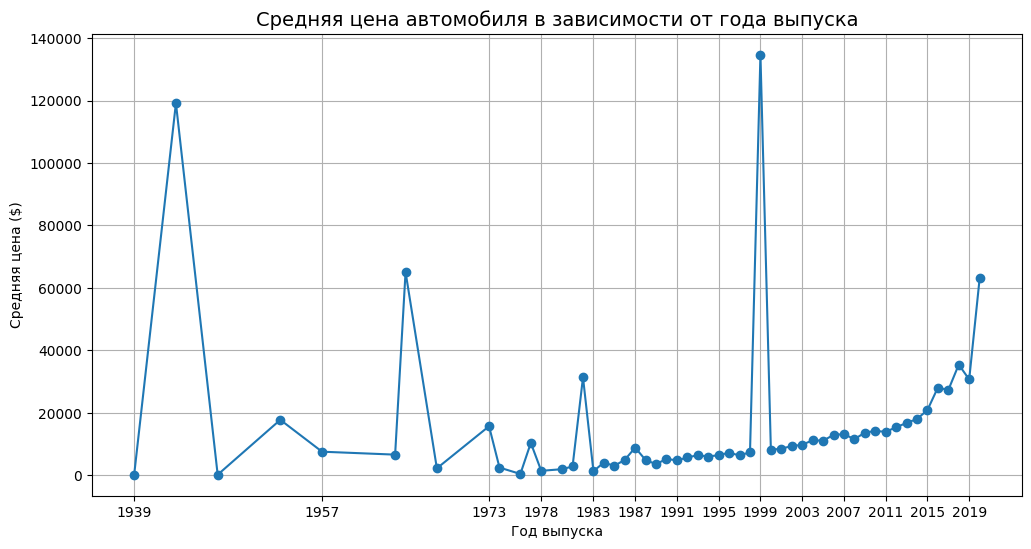

In [61]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Prod. year'] = pd.to_numeric(df['Prod. year'], errors='coerce')

df.dropna(subset=['Price', 'Prod. year'], inplace=True)

avg_price_per_year = df.groupby('Prod. year')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_year['Prod. year'], avg_price_per_year['Price'], marker='o')
plt.title('Средняя цена автомобиля в зависимости от года выпуска', fontsize=14)
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена ($)')
plt.grid(True)

plt.xticks(avg_price_per_year['Prod. year'][::4])

plt.show()

In [64]:
import numpy as np

# Заменяем "-" на NaN только в числовых столбцах
numeric_columns = ['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
df[numeric_columns] = df[numeric_columns].replace("-", np.nan)

# Проверяем пропущенные значения снова
missing_values = df.isnull().sum()
print("Пропущенные значения в данных:\n", missing_values)

# Фильтрация только числовых столбцов для анализа выбросов
numerical_data = df.select_dtypes(include=[np.number])

# 2. Анализ выбросов
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).sum()
print("\nВыбросы в числовых столбцах:\n", outliers)

# 3. Анализ смещения данных
category_counts = df['Manufacturer'].value_counts()
print("\nРаспределение автомобилей по производителям:\n", category_counts)

# 4. Анализ актуальности данных
max_production_year = df['Prod. year'].max()
min_year_from_car = df['Prod. year'].min()

print("\nПоследний год производства в данных:", max_production_year)
print("\nначальный год:", min_year_from_car)

Пропущенные значения в данных:
 ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

Выбросы в числовых столбцах:
 ID            2531
Price         1073
Prod. year     982
Cylinders     4870
Airbags          0
dtype: int64

Распределение автомобилей по производителям:
 Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

Последний год производств

В наборе данных есть пропущенные значения в столбце Levy. Выбросы встречаются с столбцах Price, Prod. year, Cylinders. Набор данных сильно смещён в сторону нескольких производителей, таких как Hyundai, Toyota, и Mercedes-Benz, которые составляют большую часть данных.
В то же время, такие бренды, как Lamborghini, Pontiac, Saturn, и Aston Martin, представлены всего одной записью. Последний год выпуска в наборе данных — 2020: Данные устарели на несколько лет. Это может означать, что новые модели автомобилей, выпущенные после 2020 года, не учтены, что снижает актуальность данных для анализа современного рынка автомобилей.

####  **Примеры решения обнаруженных проблем**

В столбце Levy имеется 5819 пропущенных значений. Заполним пропуски, подставив 0.

In [65]:
df['Levy'] = df['Levy'].fillna(0) 

Заменим выбрасы на медиану

In [66]:
for col in ['Price', 'Prod. year', 'Cylinders']:
    Q1 = df[col].quantile(0.25)  # 1-й квартиль
    Q3 = df[col].quantile(0.75)  # 3-й квартиль
    IQR = Q3 - Q1  # Интерквартильный размах
    median = df[col].median()  # Медиана

    # Определение выбросов
    condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

    # Замена выбросов на медиану
    df[col] = np.where(condition, median, df[col])

Если нужно использовать для анализа машины определенных лет выпуска, можем отфильтровать данные следующим образом:

In [67]:
df = df[df['Prod. year'] >= 2015]

#### **Оценка качества данных**

Для каждой категориальной переменной, такой как Manufacturer, Model, Category, можно подсчитать количество уникальных значений. Это даст представление о разнообразии и информативности данных.


In [63]:
unique_counts = df.nunique()
print(unique_counts)

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64


Мы видим здесь 65 брендов машин и 1590 различных моделей, что говорит а разнообразии данных.

Проверим на соответствие реальным данным

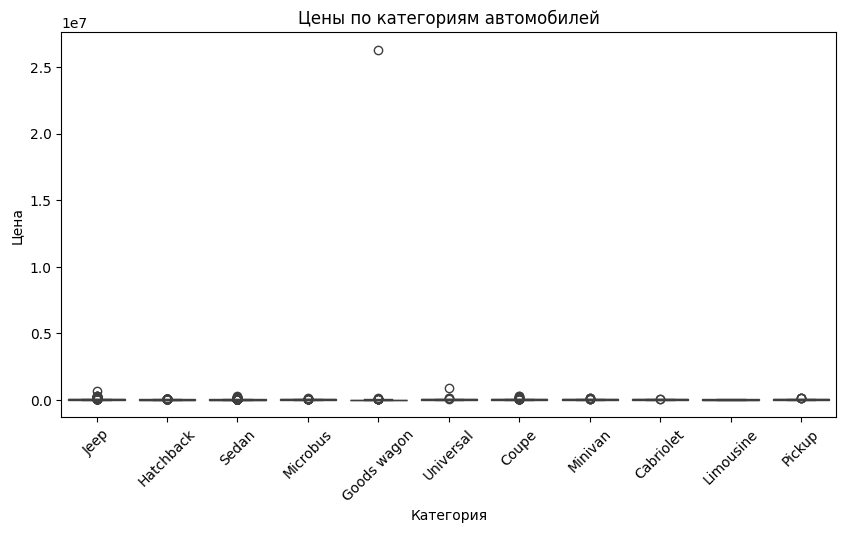

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Цены по категориям автомобилей')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

данная диаграмма была получина до устранения выбрасов.

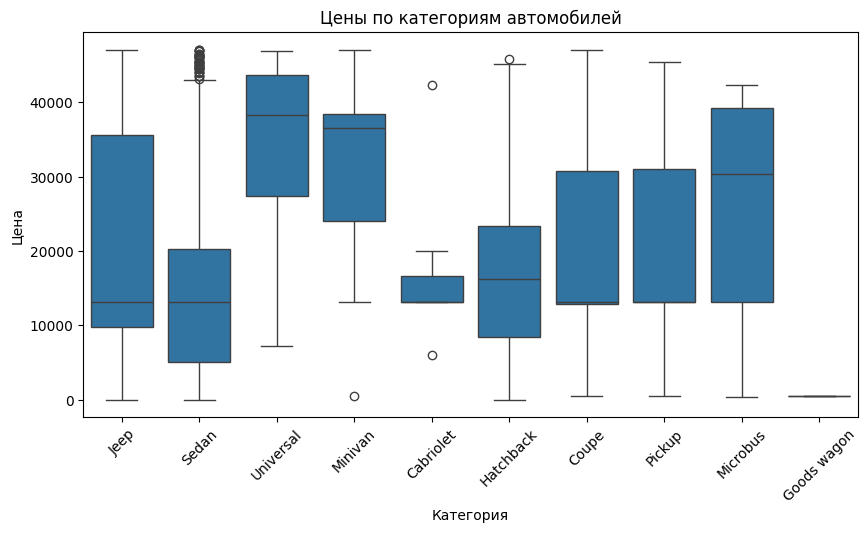

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Цены по категориям автомобилей')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

После устранения выбрасов, диаграмма выглядит лучше, хотя здесь все равно присутствуют очень маленькие значения, что не соответсвуем реальным ценам на машины. Из этого можем сделать вывод, что цены в наборе данных не особо соответствуют реальности. 

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [85]:
# Загрузка данных
new1 = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Разбиение на обучающую и временную выборки
train_data, temp_data = train_test_split(new1, test_size=0.3, random_state=42)

# Разбиение временной выборки на контрольную и тестовую
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 13465
Размер контрольной выборки: 2886
Размер тестовой выборки: 2886


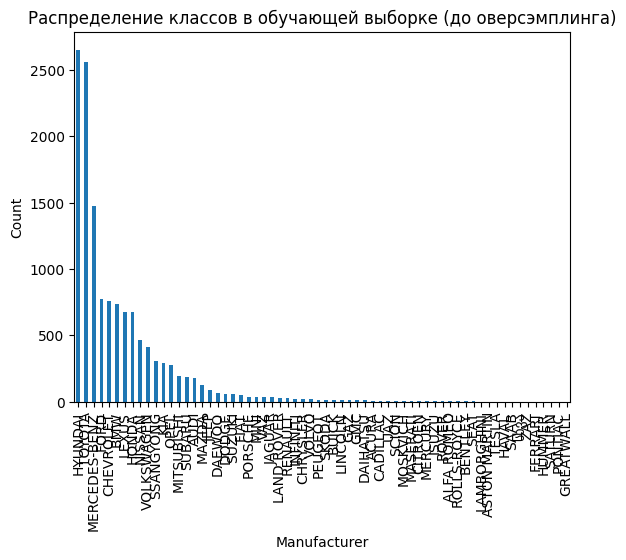

In [86]:
# Определяем целевую переменную и признаки
X = train_data.drop(columns=['Manufacturer'])  # Признаки
y = train_data['Manufacturer']  # Целевая переменная

# Функция для визуализации распределения
def plot_class_distribution(data, title):
    data['Manufacturer'].value_counts().plot(kind='bar', title=title)
    plt.xlabel('Manufacturer')
    plt.ylabel('Count')
    plt.show()

# Визуализация распределения классов до оверсэмплинга
plot_class_distribution(train_data, 'Распределение классов в обучающей выборке (до оверсэмплинга)')

Выполним овер- и андер- слемпинг.

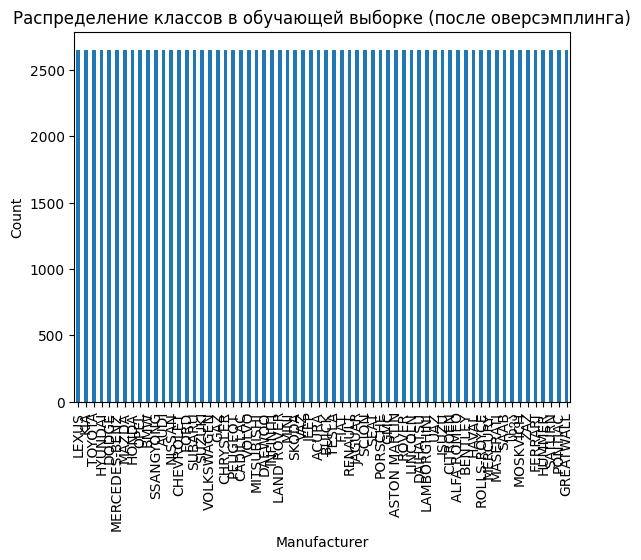

In [87]:
# Применение оверсэмплинга
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Создание нового DataFrame для оверсэмплинга
train_resampled_over = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled_over['Manufacturer'] = y_resampled

# Визуализация распределения классов после оверсэмплинга
plot_class_distribution(train_resampled_over, 'Распределение классов в обучающей выборке (после оверсэмплинга)')

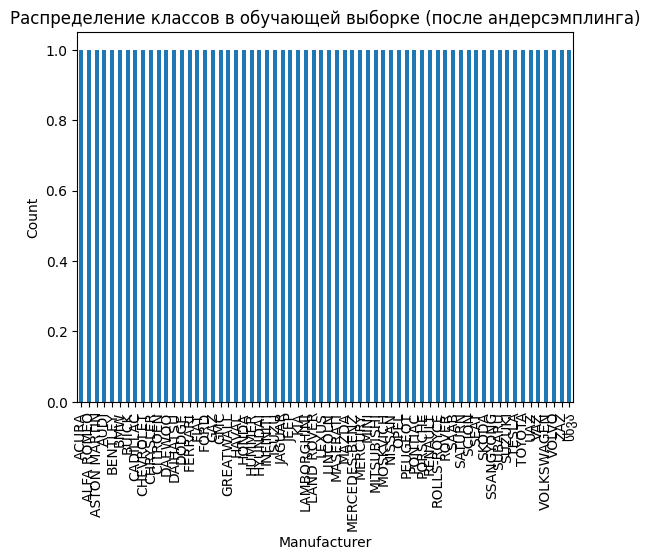

In [88]:
# Применение андерсэмплинга
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Создание нового DataFrame для андерсэмплинга
train_resampled_under = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled_under['Manufacturer'] = y_resampled

# Визуализация распределения классов после андерсэмплинга
plot_class_distribution(train_resampled_under, 'Распределение классов в обучающей выборке (после андерсэмплинга)')